# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 3. Сравнение оценок и эффективные оценки

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача в этом задании оценивается в **15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_sample = norm_distr.rvs(size=N)
laplace_sample = laplacian_distr.rvs(size=N)
cauchy_sample = cauchy_distr.rvs(size=N)

Постройте график плотности распределения для всех трех распределений на одних осях.

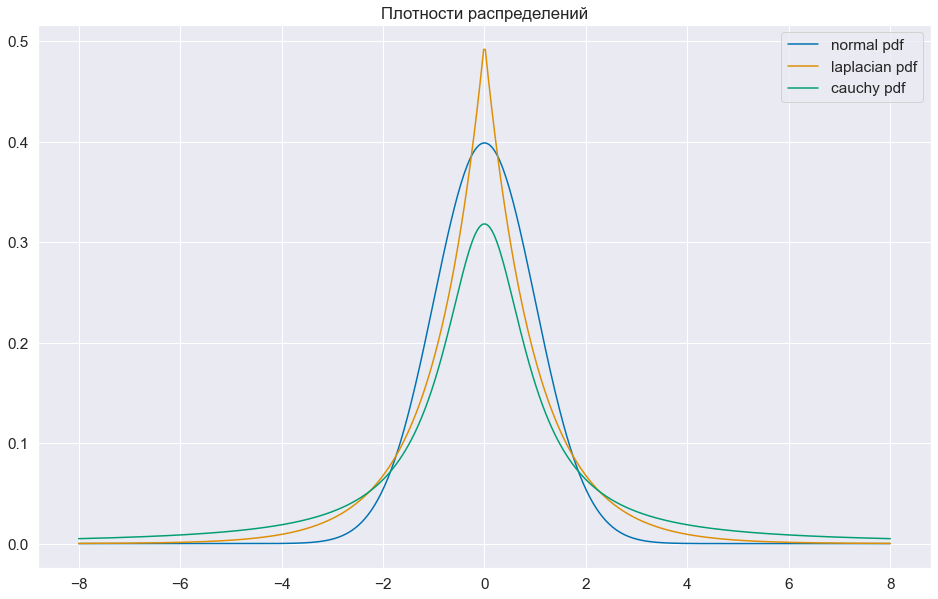

In [3]:
grid = np.linspace(-8, 8, 500)

plt.figure(figsize=(16,10))
sns.lineplot(x=grid, y=norm_distr.pdf(grid), color=color_for_normal, label="normal pdf")
sns.lineplot(x=grid, y=laplacian_distr.pdf(grid), color=color_for_laplace, label="laplacian pdf")
sns.lineplot(x=grid, y=cauchy_distr.pdf(grid), color=color_for_cauchy, label="cauchy pdf")

plt.title("Плотности распределений")
plt.legend(labels=["normal pdf", "laplacian pdf", "cauchy pdf"])

plt.legend()
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** значение математического ожидания по выборке сложнее всего найти у распределения Коши, потому что у него в теории не существует математического ожидания

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [4]:
import math

def truncated_mean(sample, alpha=0.3):
    sort_samp = np.sort(sample)
    if alpha < 0.5:
        return np.mean(sort_samp[int(alpha * len(sort_samp)) : len(sort_samp) - 1 - int(alpha * len(sort_samp))])
    alpha = 1 - alpha
    return np.mean(sort_samp[int(alpha * len(sort_samp)) : len(sort_samp) - 1 - int(alpha * len(sort_samp))])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [5]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    def integrate(x):
        return x**2*distr.pdf(x)
    quantile = distr.ppf(q=1 - alpha)
    integral = quad(integrate, 0, quantile)[0] + alpha * np.power(quantile, 2)
    return 2 * integral / np.power(1 - 2 * alpha, 2)

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

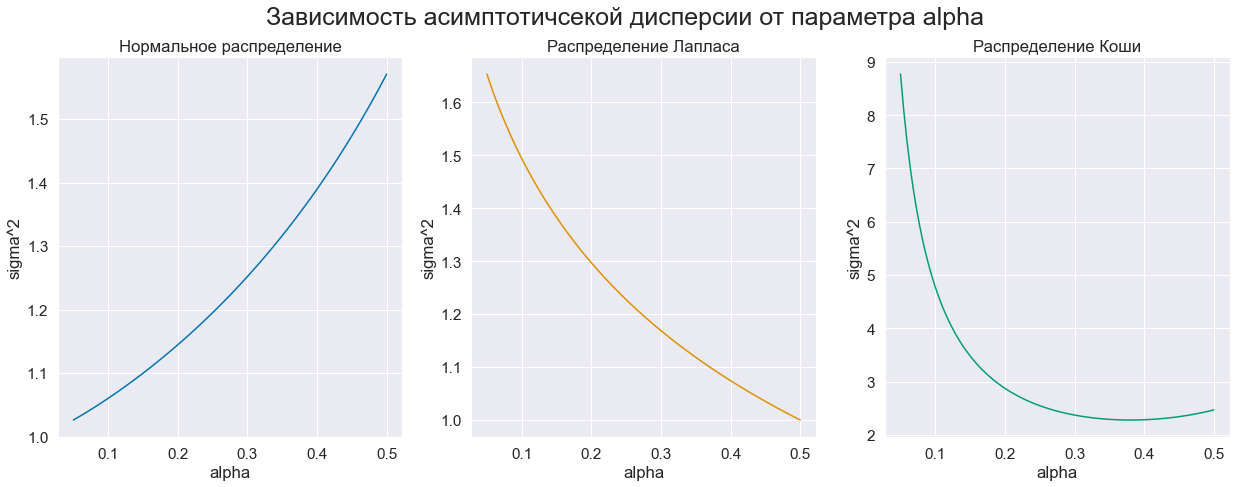

In [6]:
alpha_grid = np.linspace(0.05, 0.49999, 100)
fig, ax = plt.subplots(1, 3, figsize=(21, 7))

asymp_var_vec = np.vectorize(asymp_var)
colors = [color_for_normal, color_for_laplace, color_for_cauchy]
distrs = [norm_distr, laplacian_distr, cauchy_distr]
titles = ['Нормальное распределение', 'Распределение Лапласа', 'Распределение Коши']

fig.suptitle("Зависимость асимптотичсекой дисперсии от параметра alpha", fontsize=25)

for i in range(3):
    ax[i].plot(alpha_grid, asymp_var_vec(distrs[i], alpha_grid), color=colors[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('sigma^2')
    ax[i].set_xlabel('alpha')

plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** Усеченное среднее порядка 0 - выборочное среднее (т.е. матожидание). Усеченное среднее порядка 0.5 - медиана.
У нормального распределения дисперсия растет с ростом alpha, у распределения Лапласа, наоборот, убывает. Дисперсия у распределения Коши убывает до значения примерно alpha = 0.38, потом начинает расти.

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [7]:
alpha = 0.35

def count_trunc(sample, function):
    return np.vectorize(lambda i: float(function(sample[:(i + 1)])))(np.arange(sample.size))

def countEstimate(sample):
    return np.cumsum(sample) / np.arange(1, N + 1), count_trunc(sample, np.median), count_trunc(sample, truncated_mean)

def plot(sample, title, color):
    grid = np.arange(1, len(sample) + 1)
    plt.figure(figsize=(16, 9))
    
    mean, median, trunc_mean = countEstimate(sample)
    plt.plot(grid, mean, label='mean', color=color)
    plt.plot(grid, median, label='median', linestyle=':', color=color)
    
    plt.plot(grid, trunc_mean, label='truncated mean', linestyle='--', color=color)

    plt.xlabel('размер выборки')
    plt.ylabel('значение оценки')
    plt.title(title)
    plt.legend()
    plt.show

**Нормальное распределение**

/home/aleksandr/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aleksandr/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


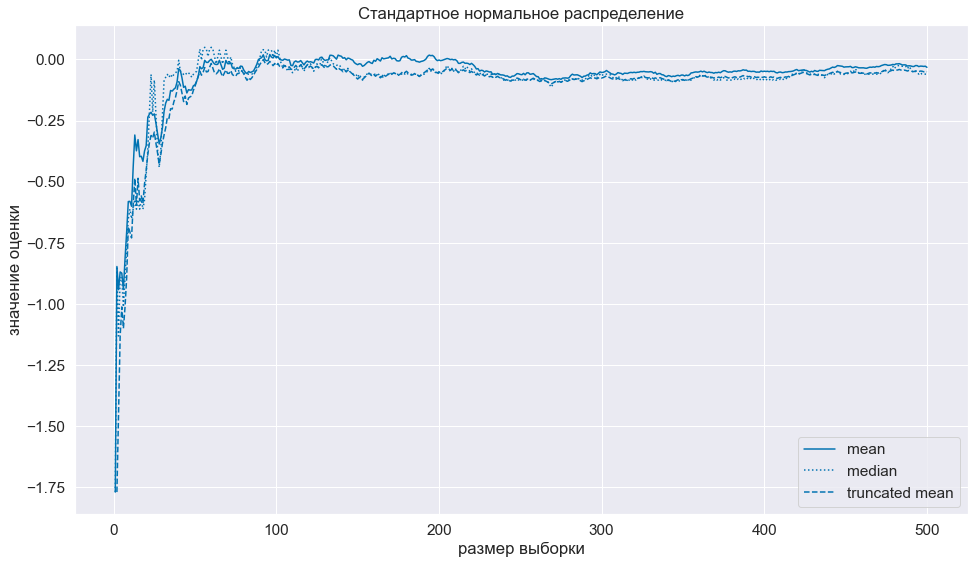

In [8]:
plot(norm_sample, 'Стандартное нормальное распределение', color_for_normal)

**Распределение Лапласа**

/home/aleksandr/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aleksandr/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


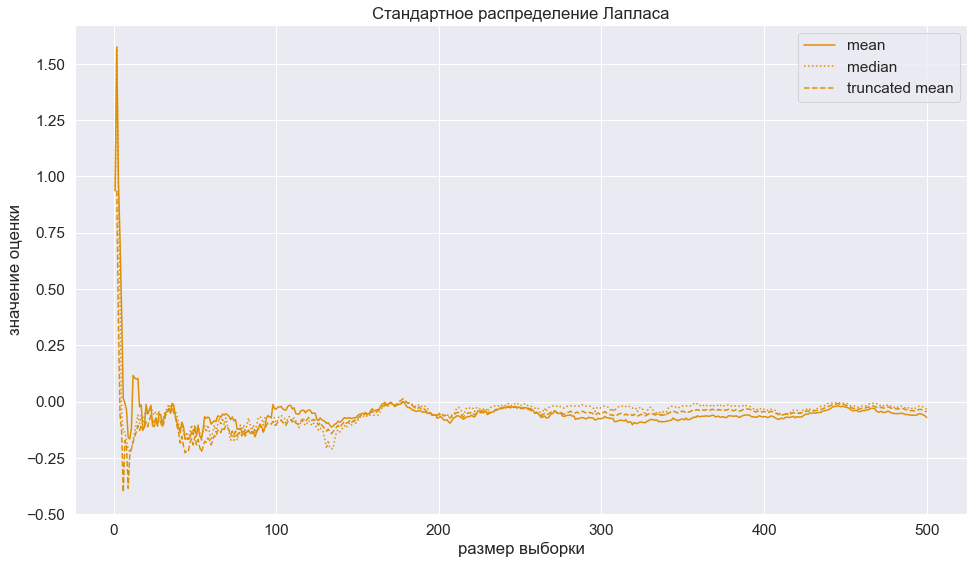

In [9]:
plot(laplace_sample, 'Стандартное распределение Лапласа', color_for_laplace)

**Распределение Коши**

/home/aleksandr/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aleksandr/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


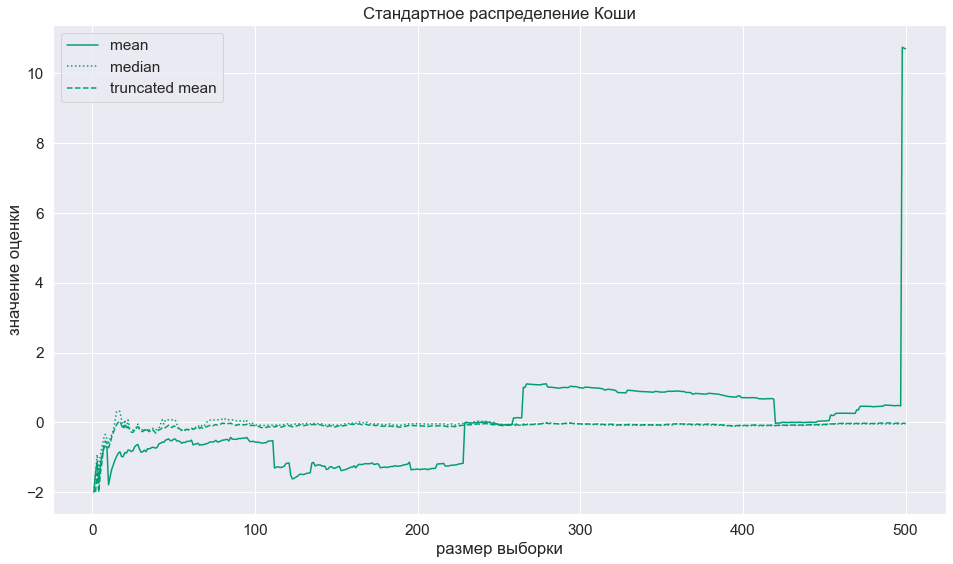

In [10]:
plot(cauchy_sample, 'Стандартное распределение Коши', color_for_cauchy)

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** Для распределения Коши усеченное среднее стремится к нулю, потому что параметр alpha = 0.35 близок к оптимальному. У распределения Коши матожидания не существует, поэтому график среднего совершил большой скачок. У нормального лучше всего среднее, потом усеченное среднее, потом медиана, у распределения Лапласа - наоборот - лучше всего медиана, потом усеченное среднее, потом среднее. Это согласуется с графиками про изменение дисперсии с ростом alpha

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

Пока не сделал. См. задачу 3

In [11]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /home/aleksandr/Documents/5sem/python_stats/dz3/winequality-red.csv
100%|████████████████████████████████████████| 101k/101k [00:00<00:00, 2.08MB/s]


In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("winequality-red.csv")

In [14]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [15]:
data['category'] = np.where(data['alcohol'] <= 10, 'low alcohol', 'medium alcohol')
data['category'] = np.where(data['alcohol'] > 12, 'high alcohol', data['category'])
data.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low alcohol
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low alcohol
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,low alcohol
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,low alcohol
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [16]:
sugar_df = pd.DataFrame()
sugar_df['mean'] = data.groupby(['category']).mean()['residual sugar'].round(2)
sugar_df['median'] = data.groupby(['category']).median()['residual sugar']
sugar_df

,mean,median
category,,
high alcohol,2.76,2.3
low alcohol,2.45,2.1
medium alcohol,2.59,2.2


In [17]:
sugar_df['mean'].mean()

2.6

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Чем больше содержание алкоголя, тем больше сахара. Это видно как из столбца со среднем, так и с медианой. В целом среднее содержание остаточного сахара в этом датасете 2.6, а медиана 2.2

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

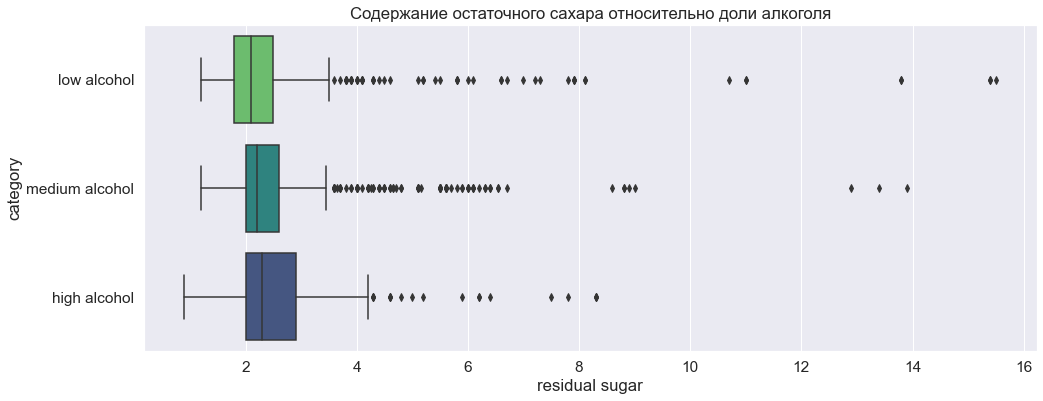

In [18]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]

plt.figure(figsize=(16,6))
plt.title("Содержание остаточного сахара относительно доли алкоголя")
sns.boxplot(data=data, x='residual sugar', y='category', palette=palette)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** Медианы из боксплота и из предыдущего пункта совпали. Из боксплота также видно, что медианы немного меньше среднего. Для оценивания содержания сахара лучше использовать медиану, потому что среднее смещено в большую сторону из-за выбросов

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

Text(0.5, 1.0, 'Качество вина в зависимости от содержания алкоголя и лимонной кислоты')

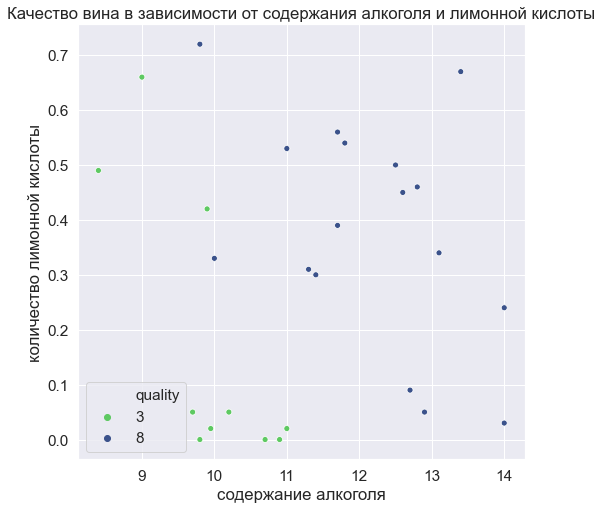

In [19]:
plt.figure(figsize=(8, 8))
list_of_values = [3,8]

sns.scatterplot(data=data[data['quality'].isin(list_of_values)],
                x='alcohol', y='citric acid',
                palette=[palette[0]] + [palette[-1]], hue='quality')
plt.ylabel('количество лимонной кислоты')
plt.xlabel('содержание алкоголя')
plt.title('Качество вина в зависимости от содержания алкоголя и лимонной кислоты')

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [20]:
# см. задачу 3

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [21]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [22]:
#YOUR CODE GOES HERE

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $ \theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

нижняя оценка дисперсии несмещенной оценки: $\theta ( 1-\theta )$

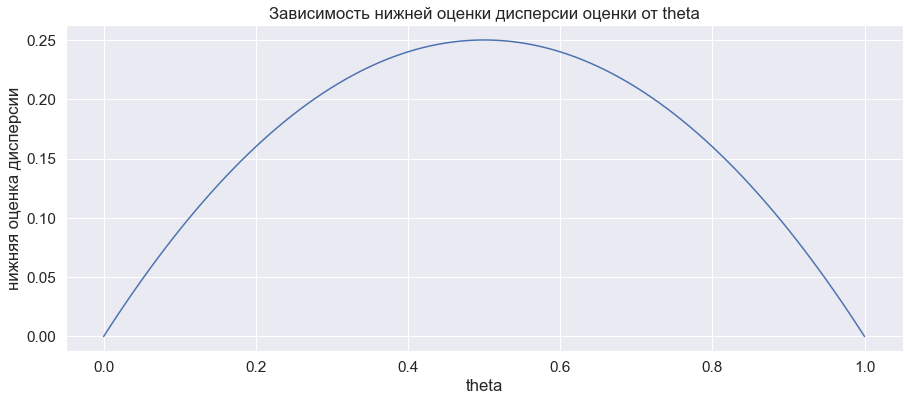

In [23]:
grid = np.arange(0, 1.01, 0.01)

plt.figure(figsize=(15, 6))
values = grid * (1 - grid)
plt.plot(grid, values)
plt.xlabel("theta")
plt.ylabel("нижняя оценка дисперсии")
plt.title("Зависимость нижней оценки дисперсии оценки от theta")
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** При theta = 0.5 нижняя оценка самая высокая

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [24]:
def calc_bern_varience(sample, sz):
    means = np.random.choice(sample[:sz], sz * sz).reshape([sz, sz]).mean(axis = 0)
    return np.power(means, 2).mean() - np.power(means.mean(), 2)

In [25]:
variences = []
n = 1000
samples = []
for theta in grid:
    sample = sps.bernoulli(theta).rvs(n)
    samples.append(sample)
    variences.append(calc_bern_varience(sample, n))
    

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

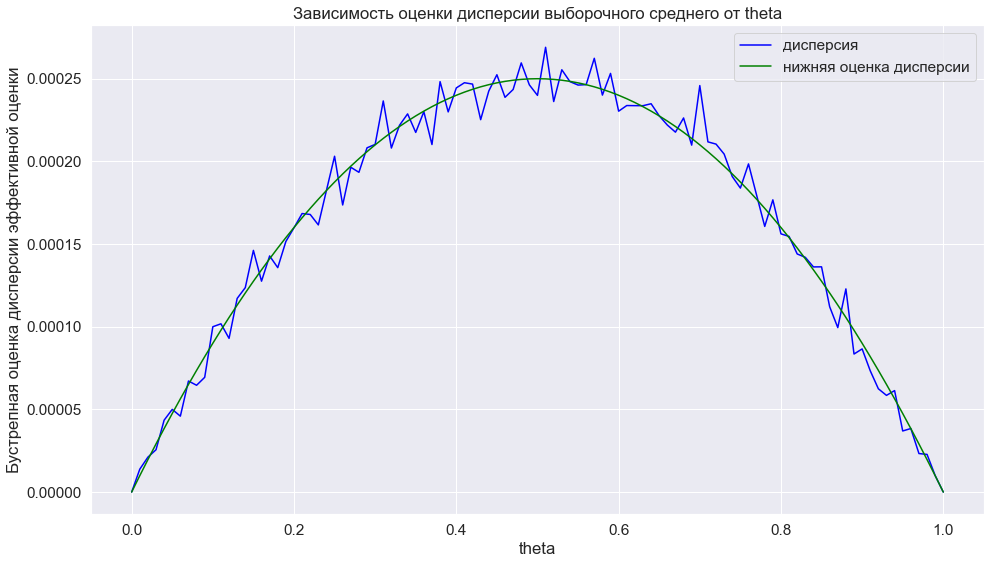

In [26]:
plt.figure(figsize = (16, 9))
plt.plot(grid, np.array(variences), color = 'blue', label = 'дисперсия')
plt.plot(grid, grid * (1 - grid) / n, color = 'green', label = 'нижняя оценка дисперсии')
plt.title("Зависимость оценки дисперсии выборочного среднего от theta")
plt.xlabel("theta")
plt.ylabel("Бустрепная оценка дисперсии эффективной оценки")
plt.legend()
plt.show()


**Вывод**